# Thinkful Capstone 2: Supervised Learning
## Google Analytics Customer Propensity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ds_useful as ds

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

The below code searches through every station to find the one closest to Valencia, Spain.
I am doing this because I may want to combine this dataset with weather data and generation data only available in Spain

In [2]:
import requests
from bs4 import BeautifulSoup
from contextlib import closing

url = 'https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2020/'

with closing(requests.get(url)) as response:
    if response.status_code == 200:
        html = BeautifulSoup(response.text)

        tbody = html.select_one('table')
        a_links = tbody.select('a')
        csvs = []
        for a_link in a_links:
            if '.csv' in a_link.text:
                csvs.append(a_link.text)
    else: print('woops')

locations = pd.DataFrame(columns=['STATION', 'LATITUDE','LONGITUDE'])
for i, csv in enumerate(csvs):
    try:
        station = pd.read_csv('{}{}'.format(url, csv), usecols=['LATITUDE','LONGITUDE']).iloc[0]
        station['STATION'] = csv
        locations = locations.append(station)
    except:
        continue

locations['LAT_DISTANCE'] = np.abs(locations['LATITUDE'] - 39.469942)
locations['LONG_DISTANCE'] = np.abs(locations['LONGITUDE'] - 0.287527)
locations['DISTANCE'] = np.sqrt(locations['LAT_DISTANCE']**2 + locations['LONG_DISTANCE']**2)
sorted_locations = locations.sort_values('DISTANCE')

In [3]:
sorted_locations.head()

,STATION,LATITUDE,LONGITUDE,LAT_DISTANCE,LONG_DISTANCE,DISTANCE
0,08286099999.csv,39.950000,-0.066667,0.480058,0.354194,0.596581
0,08365099999.csv,38.833000,0.117000,0.636942,0.170527,0.659374
0,08285099999.csv,39.483333,-0.383333,0.013391,0.670860,0.670994
0,08014399999.csv,39.583333,-0.450000,0.113391,0.737527,0.746193
0,08284099999.csv,39.489314,-0.481625,0.019372,0.769152,0.769396


Now I will accumulate all the surface temperature data at that station from 1980 to present

In [4]:
from requests import HTTPError as HTTPError

def get_nearest_df(base_url, years, locations):
    for i in range(5):
        station_id = locations.iloc[i,0]
        try:
            data = pd.DataFrame()
            for year in years:
                current_url = '{}{}/{}'.format(base_url, year, station_id)
                print(current_url)
                df = pd.read_csv(current_url, na_values=[9999.9])
                data = pd.concat([data, df], axis=0)
            return data
        except:
            print('Error: probably not found in ', station_id)
            continue
        # except:
        #     print('Error retrieving one or more of the datasets at station_id', station_id)
        #     continue

years = np.arange(1980, 2020, 1)
base_url = 'https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/'

climate = get_nearest_df(base_url, years, sorted_locations)

https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1980/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1981/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1982/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1983/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1984/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1985/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1986/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1987/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1988/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1989/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1990/08286099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1

In [5]:
# years = np.arange(1980, 2020, 1)
# station_id = '08286099999' # Station ID retrieved from the above code
# base_url = 'https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/'

# data = pd.DataFrame()
# for year in years:
#     current_url = '{}{}/{}.csv'.format(base_url, year, station_id)
#     print(current_url)
#     df = pd.read_csv(current_url)
#     data = pd.concat([data, df], axis=0)

# data.head()

In [6]:
data = climate.copy()
data.shape

(14579, 28)

In [7]:
data.isnull().sum()*100/data.shape[0]

STATION              0.000000
DATE                 0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
ELEVATION            0.000000
NAME                 0.000000
TEMP                 0.000000
TEMP_ATTRIBUTES      0.000000
DEWP                 0.013718
DEWP_ATTRIBUTES      0.000000
SLP                 69.291447
SLP_ATTRIBUTES       0.000000
STP                  0.000000
STP_ATTRIBUTES       0.000000
VISIB                0.000000
VISIB_ATTRIBUTES     0.000000
WDSP                 0.000000
WDSP_ATTRIBUTES      0.000000
MXSPD                0.000000
GUST                 0.000000
MAX                  0.000000
MAX_ATTRIBUTES       0.000000
MIN                  0.000000
MIN_ATTRIBUTES       0.000000
PRCP                 0.000000
PRCP_ATTRIBUTES      0.000000
SNDP                 0.000000
FRSHTT               0.000000
dtype: float64

In [8]:
ds.outliers_summary(data)

VISIB_ATTRIBUTES    22.182591
GUST                20.364908
STP_ATTRIBUTES      17.909322
SLP_ATTRIBUTES      17.895603
PRCP                16.969614
VISIB               16.009328
WDSP_ATTRIBUTES     10.515124
DEWP_ATTRIBUTES      9.424515
TEMP_ATTRIBUTES      8.772893
WDSP                 8.258454
MXSPD                4.993484
FRSHTT               1.728514
SNDP                 0.164620
MAX                  0.006859
STP                  0.000000
SLP                  0.000000
DEWP                 0.000000
MIN                  0.000000
TEMP                 0.000000
ELEVATION            0.000000
LONGITUDE            0.000000
LATITUDE             0.000000
STATION              0.000000
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14579 entries, 0 to 364
Data columns (total 28 columns):
STATION             14579 non-null int64
DATE                14579 non-null object
LATITUDE            14579 non-null float64
LONGITUDE           14579 non-null float64
ELEVATION           14579 non-null float64
NAME                14579 non-null object
TEMP                14579 non-null float64
TEMP_ATTRIBUTES     14579 non-null int64
DEWP                14577 non-null float64
DEWP_ATTRIBUTES     14579 non-null int64
SLP                 4477 non-null float64
SLP_ATTRIBUTES      14579 non-null int64
STP                 14579 non-null float64
STP_ATTRIBUTES      14579 non-null int64
VISIB               14579 non-null float64
VISIB_ATTRIBUTES    14579 non-null int64
WDSP                14579 non-null float64
WDSP_ATTRIBUTES     14579 non-null int64
MXSPD               14579 non-null float64
GUST                14579 non-null float64
MAX                 14579 non-null float64
MAX_ATT

In [10]:
data.columns

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP',
       'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES',
       'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MAX_ATTRIBUTES', 'MIN',
       'MIN_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'],
      dtype='object')

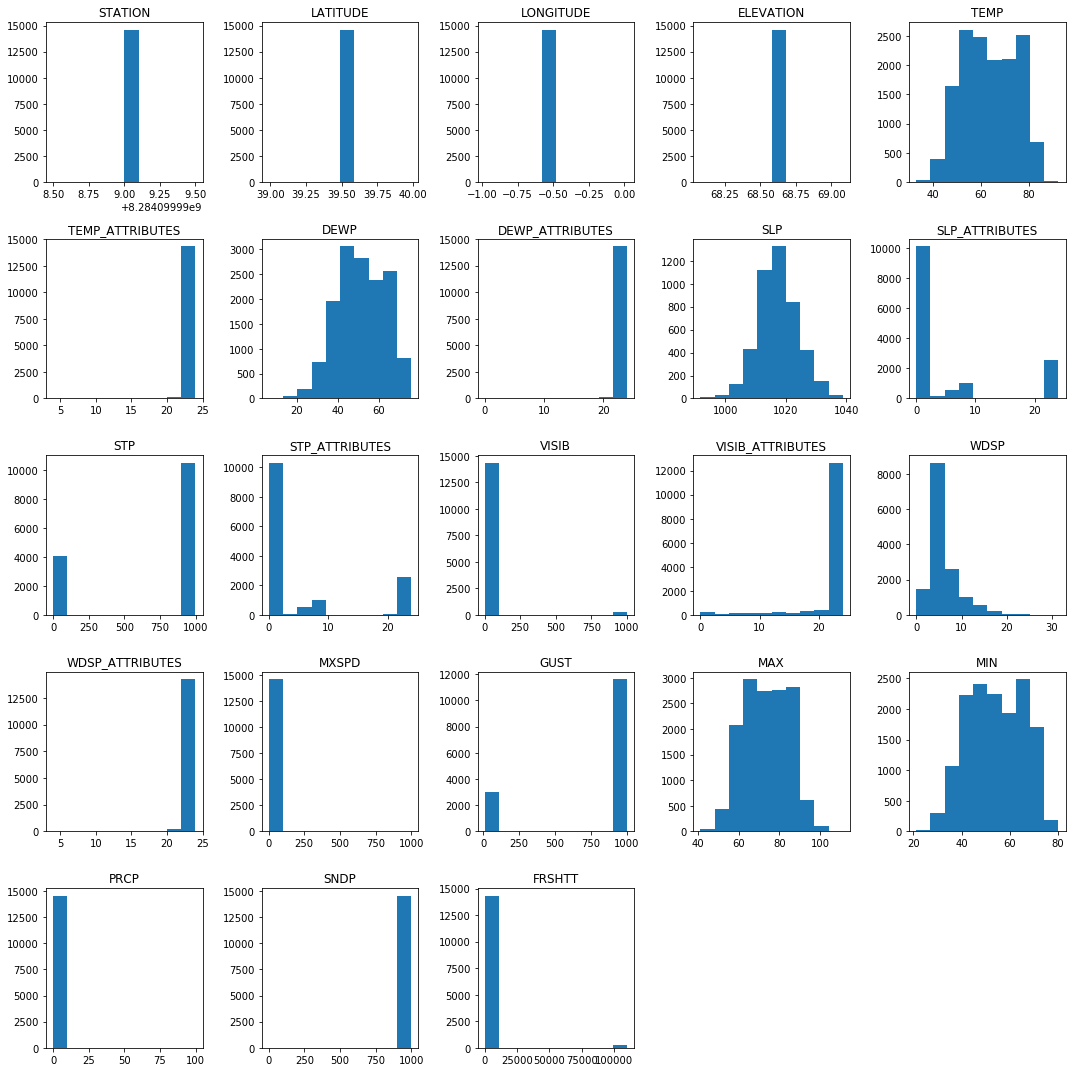

In [11]:
def plot(df, col):
    plt.hist(df[col])

ds.make_subplots(data.select_dtypes('number'), plot)

In [12]:
print('Object Columns:', data.select_dtypes('object').columns)
print()
print('Number Columns:', data.select_dtypes('number').columns)

Object Columns: Index(['DATE', 'NAME', 'MAX_ATTRIBUTES', 'MIN_ATTRIBUTES', 'PRCP_ATTRIBUTES'], dtype='object')

Number Columns: Index(['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'TEMP',
       'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES',
       'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MIN', 'PRCP', 'SNDP',
       'FRSHTT'],
      dtype='object')


In [13]:
for col in data.columns:
    if 'ATTRIBUTES' in col:
        print(col, data[col].nunique(), data[col].unique())

TEMP_ATTRIBUTES 19 [24 23 22 19 21 20 18 15 17 12  8  9 14 10 16 13  7  6  4]
DEWP_ATTRIBUTES 19 [24 23 22 19 21 20 18 15 17 12  8  9 14 10 16 13  6  0  4]
SLP_ATTRIBUTES 21 [ 0  4  5  6  8  7  9 24 23 22 21 18 14 10 20 19 15 17 13 16 12]
STP_ATTRIBUTES 20 [ 0 24 23 22 21 18 14 10 20 19 15  8  7  9  6  5 17 13 16  4]
VISIB_ATTRIBUTES 22 [24 23 22 19 21 20 18 15 17 12  8  9 14 10 16 13  7  6 11  4  0  5]
WDSP_ATTRIBUTES 19 [24 23 22 19 21 20 18 15 17 12  8  9 13 10 16 14  7  6  4]
MAX_ATTRIBUTES 2 [' ' '*']
MIN_ATTRIBUTES 2 [' ' '*']
PRCP_ATTRIBUTES 10 ['F' 'E' 'G' 'I' 'H' ' ' 'A' 'D' 'C' 'B']


In [14]:
locations['LAT_DISTANCE'] = np.abs(locations['LATITUDE'] - 39.469942)
locations['LONG_DISTANCE'] = np.abs(locations['LONGITUDE'] - 0.287527)

In [15]:
years = np.arange(2015, 2019, 1)
base_url = 'https://www.ncei.noaa.gov/data/global-hourly/access/'
hour_data = get_nearest_df(base_url, years, sorted_locations)

https://www.ncei.noaa.gov/data/global-hourly/access/2015/08286099999.csv
https://www.ncei.noaa.gov/data/global-hourly/access/2016/08286099999.csv
https://www.ncei.noaa.gov/data/global-hourly/access/2017/08286099999.csv
https://www.ncei.noaa.gov/data/global-hourly/access/2018/08286099999.csv


In [16]:
hour_data

,AA1,AA2,AA3,AJ1,AW1,AY1,AY2,AZ1,AZ2,CALL_SIGN,...,OD1,QUALITY_CONTROL,REM,REPORT_TYPE,SLP,SOURCE,STATION,TMP,VIS,WND
0,"03,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN05808286 26/69 /2905 10050 20020 30276 4033...,FM-12,"10331,1",4,8286099999,"+0050,1","019000,1,9,9","290,1,N,0026,1"
1,"03,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN08808286 06/70 /2906 10050 20007 30290 4034...,FM-12,"10345,1",4,8286099999,"+0050,1","020000,1,9,9","290,1,N,0031,1"
2,"03,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN05808286 26/70 /2907 10070 21002 30312 4036...,FM-12,"10367,1",4,8286099999,"+0070,1","020000,1,9,9","290,1,N,0036,1"
3,"03,0000,9,1","06,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN06408286 06/69 /2103 10139 20034 30299 4035...,FM-12,"10352,1",4,8286099999,"+0139,1","019000,1,9,9","210,1,N,0015,1"
4,"03,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN05808286 26/68 /1706 10145 20036 30288 4034...,FM-12,"10341,1",4,8286099999,"+0145,1","018000,1,9,9","170,1,N,0031,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,"01,9999,9,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN004BUFR,FM-12,"10293,1",4,8286099999,"+0100,1","020000,1,9,9","300,1,N,0015,1"
8021,"01,9999,9,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN004BUFR,FM-12,"10296,1",4,8286099999,"+0085,1","020000,1,9,9","300,1,N,0021,1"
8022,"03,9999,9,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN004BUFR,FM-12,"10296,1",4,8286099999,"+0080,1","020000,1,9,9","290,1,N,0026,1"
8023,"01,9999,9,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN004BUFR,FM-12,"10292,1",4,8286099999,"+0080,1","020000,1,9,9","290,1,N,0026,1"


In [17]:
ds.missingness_summary(hour_data)

OC1                99.971220
OD1                99.956830
AY2                99.388423
AY1                99.359643
EQD                99.201353
GA3                98.708494
AJ1                98.668921
IA1                98.668921
MW1                97.625643
IA2                97.427780
GA2                96.783826
AZ2                96.733460
AZ1                96.557182
AA3                96.521207
AW1                95.423967
GE1                95.075008
GA1                95.075008
GF1                94.780012
KA1                92.887722
AA2                81.238983
MD1                 1.093643
AA1                 0.151095
MA1                 0.028780
VIS                 0.000000
QUALITY_CONTROL     0.000000
TMP                 0.000000
STATION             0.000000
SOURCE              0.000000
SLP                 0.000000
REPORT_TYPE         0.000000
REM                 0.000000
NAME                0.000000
LATITUDE            0.000000
CALL_SIGN           0.000000
CIG           

In [18]:
data

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,8284099999,1980-01-01,39.489314,-0.481625,68.58,"VALENCIA, SP",57.2,24,43.8,24,...,23.9,29.9,69.8,,46.4,,0.0,F,999.9,0
1,8284099999,1980-01-02,39.489314,-0.481625,68.58,"VALENCIA, SP",57.9,24,39.7,24,...,22.0,999.9,66.2,,50.0,,0.0,F,999.9,0
2,8284099999,1980-01-03,39.489314,-0.481625,68.58,"VALENCIA, SP",47.4,24,37.9,24,...,8.0,999.9,57.2,,37.4,,0.0,F,999.9,0
3,8284099999,1980-01-04,39.489314,-0.481625,68.58,"VALENCIA, SP",45.3,24,38.3,24,...,8.0,999.9,60.8,,33.8,,0.0,F,999.9,0
4,8284099999,1980-01-05,39.489314,-0.481625,68.58,"VALENCIA, SP",46.9,24,36.1,24,...,14.0,22.0,64.4,,33.8,,0.0,F,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,8284099999,2019-12-27,39.489314,-0.481625,68.58,"VALENCIA, SP",51.2,24,44.7,24,...,6.0,999.9,65.3,,40.6,*,0.0,G,999.9,0
361,8284099999,2019-12-28,39.489314,-0.481625,68.58,"VALENCIA, SP",48.1,24,42.9,24,...,8.0,999.9,59.0,,36.9,*,0.0,G,999.9,100000
362,8284099999,2019-12-29,39.489314,-0.481625,68.58,"VALENCIA, SP",48.9,24,41.6,24,...,8.0,999.9,59.0,*,41.9,,0.0,G,999.9,0
363,8284099999,2019-12-30,39.489314,-0.481625,68.58,"VALENCIA, SP",50.0,24,43.0,24,...,8.9,999.9,60.8,,40.1,*,0.0,G,999.9,0


In [19]:
hour_data.head()

,AA1,AA2,AA3,AJ1,AW1,AY1,AY2,AZ1,AZ2,CALL_SIGN,...,OD1,QUALITY_CONTROL,REM,REPORT_TYPE,SLP,SOURCE,STATION,TMP,VIS,WND
0,"03,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN05808286 26/69 /2905 10050 20020 30276 4033...,FM-12,"10331,1",4,8286099999,"+0050,1","019000,1,9,9","290,1,N,0026,1"
1,"03,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN08808286 06/70 /2906 10050 20007 30290 4034...,FM-12,"10345,1",4,8286099999,"+0050,1","020000,1,9,9","290,1,N,0031,1"
2,"03,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN05808286 26/70 /2907 10070 21002 30312 4036...,FM-12,"10367,1",4,8286099999,"+0070,1","020000,1,9,9","290,1,N,0036,1"
3,"03,0000,9,1","06,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN06408286 06/69 /2103 10139 20034 30299 4035...,FM-12,"10352,1",4,8286099999,"+0139,1","019000,1,9,9","210,1,N,0015,1"
4,"03,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999,...,NaN,V020,SYN05808286 26/68 /1706 10145 20036 30288 4034...,FM-12,"10341,1",4,8286099999,"+0145,1","018000,1,9,9","170,1,N,0031,1"


In [20]:
hour_data.columns

Index(['AA1', 'AA2', 'AA3', 'AJ1', 'AW1', 'AY1', 'AY2', 'AZ1', 'AZ2',
       'CALL_SIGN', 'CIG', 'DATE', 'DEW', 'ELEVATION', 'EQD', 'GA1', 'GA2',
       'GA3', 'GE1', 'GF1', 'IA1', 'IA2', 'KA1', 'LATITUDE', 'LONGITUDE',
       'MA1', 'MD1', 'MW1', 'NAME', 'OC1', 'OD1', 'QUALITY_CONTROL', 'REM',
       'REPORT_TYPE', 'SLP', 'SOURCE', 'STATION', 'TMP', 'VIS', 'WND'],
      dtype='object')

In [21]:
greenhouse = pd.read_table('./brw_daily_greenhouse.txt', sep=' ', na_values=[-999.99, -99.99, -9])
greenhouse

FileNotFoundError: [Errno 2] File b'./brw_daily_greenhouse.txt' does not exist: b'./brw_daily_greenhouse.txt'

In [ ]:
ds.missingness_summary(greenhouse)

In [ ]:
hawaii = pd.read_table('./mlo_daily_greenhouse.txt', sep=' ', na_values=[-999.99, -99.99, -9])
hawaii

In [ ]:
ds.missingness_summary(hawaii)

In [ ]:
ant = pd.read_table('./spo_daily_greenhouse.txt', sep=' ', na_values=[-999.99, -99.99, -9])
ant = ant.loc[ant['year'] >= 1980]
ant

In [ ]:
ds.missingness_summary(ant)

In [ ]:
longitude = ant['longitude'].max()
latitude = ant['latitude'].max()

In [ ]:
locations['LAT_DISTANCE'] = np.abs(locations['LATITUDE'] - latitude)
locations['LONG_DISTANCE'] = np.abs(locations['LONGITUDE'] - longitude)
locations['DISTANCE'] = np.sqrt(locations['LAT_DISTANCE']**2 + locations['LONG_DISTANCE']**2)
sorted_locations = locations.sort_values('DISTANCE')
sorted_locations

In [ ]:
years = np.arange(1980, 2017, 1)
base_url = 'https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/'
climate = get_nearest_df(base_url, years, sorted_locations)

In [ ]:
climate.head()

In [ ]:
climate['datetime'] = pd.to_datetime(climate['DATE'])
climate.drop('DATE', axis=1, inplace=True)
climate.head()

In [ ]:
ant['datetime'] = pd.to_datetime(ant[['year', 'month', 'day', 'hour', 'minute', 'second']])
ant.drop(['year', 'month', 'day', 'hour', 'minute', 'second'], axis=1, inplace=True)
ant

In [ ]:
crazydata = climate.merge(ant, on='datetime')
crazydata.head()

In [ ]:
plt.hist(crazydata['value'])

In [ ]:
plt.hist(crazydata['TEMP'])

In [ ]:
def get_categorical_columns(df, unique_thresh=10, non_binary=False):
    columns = []
    for col in df.columns:
        if df[col].nunique() < unique_thresh:
            if non_binary and df[col].nunique() < 2:
                continue
            columns.append(col)
    return columns

cat_cols = get_categorical_columns(crazydata.select_dtypes('object'), non_binary=True)
cat_cols

In [ ]:
crazydata.info()

In [ ]:
dums = pd.get_dummies(crazydata, columns=cat_cols, drop_first=True)

In [ ]:
dums = pd.get_dummies(dums, columns=dums.drop(['datetime'], axis=1).select_dtypes('object').columns, drop_first=True)
dums

In [ ]:
missings = ds.missingness_summary(dums, print_log=True)
missings

dums.drop(missings.loc[missings > 90].index, axis=1, inplace=True)

In [ ]:
dums = dums.dropna(axis=0)

In [ ]:
repeats = ds.repeats_summary(dums, value_agg='mode')
rep_cols = repeats.loc[repeats == 100]
rep_cols

In [ ]:
dums.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
date_cols = ['datetime']
repeat_cols = list(rep_cols.index)
drop_cols = repeat_cols + date_cols

X = dums.drop(drop_cols, axis=1).drop('value', axis=1)
Y = dums['value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1)

rfr = RandomForestRegressor(max_depth=8)
rfr.fit(X_train, Y_train)

In [ ]:
print(rfr.score(X_train, Y_train))
print(rfr.score(X_test, Y_test))

In [ ]:
importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False)

In [ ]:
X_train['VISIB_ATTRIBUTES'].value_counts()

In [ ]:
dums.columns

In [ ]:
corr = dums.drop(drop_cols, axis=1).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr)

Things to do
- Improve Feature Selection
- Test multiple models
- GridSearchCV on best performing model
- Make Notebook pretty